In [1]:
import numpy as np
import random
import math
import operator
from matplotlib import pyplot as plt
import time

In [2]:
cluster=6 # number of clusters
m=2 # fuzzyness
e=0.1
x=np.asarray([[2,2],[3,3],[4,4],[5,5],[6,6],[7,7],[8,8],[9,9]])
maxiter=10
from sklearn.datasets.samples_generator import make_blobs


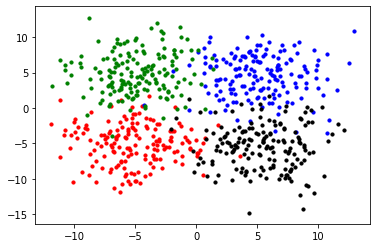

In [3]:
# centers = [(-5, -5), (5, 5),(-5, 5), (5, -5)]
# cluster_std = [2, 2,2,2]


centers =[(-5, -5), (5, 5)]
cluster_std =[3,3,3,3,3,3] #[2,2,2,2,2,2] #
centers =[(0, 10), (0, 25), (0, 40), (0, 55)]

centers =[(-5, -5), (5, 5),(-5, 5), (5, -5),(15,5),(15,-5)]

# X, y = make_blobs(n_samples=1000, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)
X, y = make_blobs(n_samples=1000, cluster_std=cluster_std, centers=centers, n_features=2, random_state=7,shuffle =True )


np.unique(y)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green", s=10, label="Cluster3")
plt.scatter(X[y == 3, 0], X[y == 3, 1], color="black", s=10, label="Cluster4")

x=X

# print(X[y == 3, 0])

In [4]:
# intialize random member ship
def initializeMembershipMatrix(n):
    membership_mat = list()
    for i in range(n.shape[0]):
        random_num_list = [random.random() for i in range(cluster)]
        summation = sum(random_num_list) 
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list) 
    return np.asarray(membership_mat) 

In [5]:
# intialize V
def intializeV():
    
    xc=np.mean(x[:,0]) 
    yc=np.mean(x[:,1])
    v=[]
    for i in range(cluster):
        if(i%2==0):
            v.append([xc + (i+1)*e,yc + (i+1)*e])
        else:
            v.append([xc - (i+1)*e,yc - (i+1)*e])  
            
    return v


In [6]:
def updateCenterV( v,u):
    for k in range(cluster):
        
        num=0
        deno= 0
        for i in range(x.shape[0]):
            p=pow(u[i,k],m)
            num = num + (p*x[i])
            deno = deno+ p
            
        v[k]=num/deno
        
    return v

In [7]:
def updateMembershipValue(membership_mat, cluster_centers,val):
    n=val.shape[0]
    k=cluster
    p = float(2/(m-1))
    for i in range(n):
        x = val[i]
        distances=[]
        
        for k in range(cluster):      
            distances.append(np.linalg.norm(val[i]-v[k]) )  
            
        for j in range(cluster):
            den=0
            for z in range(cluster):
                den= den + math.pow(float(distances[j]/distances[z]), p)  
            membership_mat[i][j] = float(1/den)   
            
    return membership_mat

In [8]:
def calcError(center,mem):
    dist=0
    for i in range(mem.shape[0]):
        dist+=np.linalg.norm(center - mem[i])
    return dist

Initialization & FCM
=================

In [10]:
u=initializeMembershipMatrix(x)
v=intializeV()
errorlist=[]
# print(u)


start=time.time()

for l in range(20):
    error=0
    v=updateCenterV(v,u)
    u=updateMembershipValue(u,v,x) 
    
    v=np.asarray(v)
    ny=np.argmax(u,axis=1)
    for q in range(v.shape[0]):
        error+=calcError(v[q],x[ny == q,:])
        
#     print(t,q,error) 

    errorlist.append([error,time.time()- start])

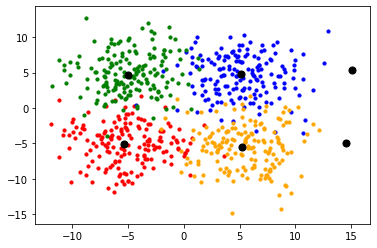

In [11]:

plt.scatter(x[y == 0, 0], x[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(x[y == 1, 0], x[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.scatter(x[y == 2, 0], x[y == 2, 1], color="green", s=10, label="Cluster3")
plt.scatter(x[y == 3, 0], x[y == 3, 1], color="orange", s=10, label="Cluster4")
plt.scatter(x=np.asarray(v)[:,0],y=np.asarray(v)[:,1], color='black',s=50)
plt.show() 


In [ ]:
# v=intializeV()
print(u)

In [ ]:
# np.sum(u,axis=1)

In [ ]:
errorlist=np.asarray(errorlist)
# errorlist=np.pad(errorlist, (0,20-errorlist.shape[0]), 'constant', constant_values=(0))
r=np.arange(errorlist.shape[0]) 
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.plot(r,errorlist[:,0])
plt.show()
# print(errorlist)

plt.xlabel('Time[sec]')
plt.ylabel('Error')
plt.plot(errorlist[:,1],errorlist[:,0])
plt.show()

np.savetxt("FCM-6cluster-errorANDtime.csv", errorlist, delimiter=",")